# Importing Libraries

In [2]:
import cv2                                       #OpenCV is an Machine Learning Package for analyzing image patterns in python.
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Computing Histogram of an Image 

In [3]:
hist_img = cv2.imread("Image.jpg",1)               #Using OpenCV #Normal Image 

# Using Numpy Array and hist() function

(array([9300.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
      

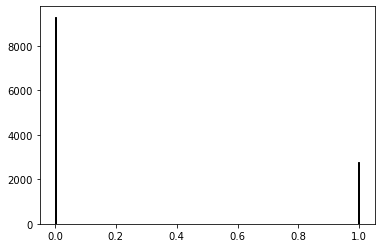

In [4]:
plt.hist(hist_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') 

# Using Opencv function calcHist()

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

images : it is the source image of type uint8 or float32 represented as “[img]”.

channels : it is the index of channel for which we calculate histogram. For grayscale image, its value is [0] and
color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

mask : mask image. To find histogram of full image, it is given as “None”.

histSize : this represents our BIN count. For full scale, we pass [256].

ranges : this is our RANGE. Normally, it is [0,256].

In [5]:
histr = cv2.calcHist([hist_img],[0],None,[256],[0,256])

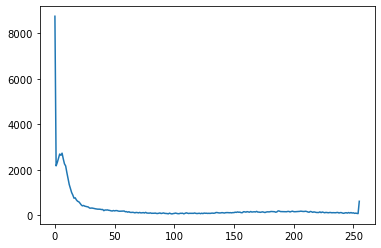

In [6]:
plt.plot(histr)
plt.show()

# Without Using calcHist()

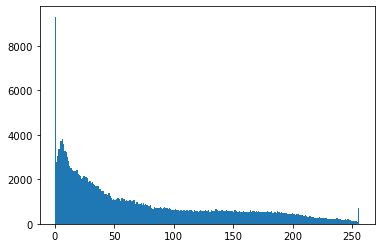

In [7]:
plt.hist(hist_img.ravel(),256,[0,256])
plt.show()

# Transformation Using OpenCV

# Translation using wrapAffine() function

Translation refers to the rectilinear shift of an object i.e. an image from one location to another. If we know the amount of shift in horizontal and the vertical direction, say (tx, ty) then we can make a transformation matrix e.g.   \begin{bmatrix}  1 & 0 & tx \\ 0 & 1 & ty \end{bmatrix}  
where tx denotes the shift along the x-axis and ty denotes shift along the y-axis i.e. the number of pixels by which we need to shift about in that direction.
Now, we can use the cv2.wrapAffine() function to implement these translations. This function requires a 2×3 array. The numpy array should be of float type.

In [9]:
img=cv2.imread("Image.jpg",1)

In [10]:
# Store height and width of the image
height, width = img.shape[:2]

In [11]:
height

320

In [12]:
width

240

In [13]:
quarter_height, quarter_width = height / 4, width / 4

In [14]:
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

In [15]:
# We use warpAffine to transform the image using the matrix,T.
img_translation = cv2.warpAffine(img, T, (width, height))

In [16]:
cv2.imshow("Originalimage", img)
cv2.imshow('Translation', img_translation)
cv2.waitKey()
  
cv2.destroyAllWindows()

# Resizing using resize() function

Image resizing refers to the scaling of images. Scaling comes in handy in many image processing as well as machine learning applications. It helps in reducing the number of pixels from an image and that has several advantages e.g. It can reduce the time of training of a neural network as the more the number of pixels in an image more is the number of input nodes that in turn increases the complexity of the model.
It also helps in zooming in on images. Many times we need to resize the image i.e. either shrink it or scale it up to meet the size requirements. OpenCV provides us several interpolation methods for resizing an image.

cv2.INTER_AREA: This is used when we need to shrink an image.

cv2.INTER_CUBIC: This is slow but more efficient.

cv2.INTER_LINEAR: This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.

cv2.resize(source, dsize, dest, fx, fy, interpolation)

source: Input Image array (Single-channel, 8-bit or floating-point) 

dsize: Size of the output array

dest: Output array (Similar to the dimensions and type of Input image array) [optional]

fx: Scale factor along the horizontal axis  [optional]

fy: Scale factor along the horizontal axis  [optional]

interpolation: One of the above interpolation methods  [optional]

In [18]:
img=cv2.imread("Image.jpg",1)

In [19]:
half = cv2.resize(img, (0, 0), fx = 0.1, fy = 0.1)

In [20]:
bigger = cv2.resize(img, (1050, 1610))

In [21]:
stretch_near = cv2.resize(img, (780, 540),
               interpolation = cv2.INTER_LINEAR)

In [22]:
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[img, half, bigger, stretch_near]
count = 4

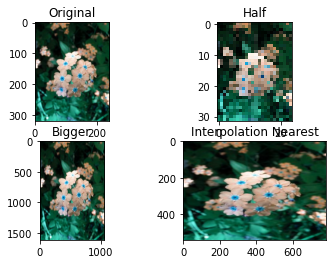

In [23]:
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])

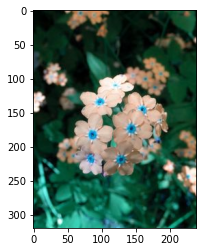

In [24]:
plt.imshow(images[0])

# Rotation

Rotating an image :- Images can be rotated to any degree clockwise or otherwise. We just need to define rotation matrix listing rotation point, degree of rotation and the scaling factor. 

In [25]:
img=cv2.imread("Image.jpg",1)

In [26]:
#Shape of image in terms of pixels.
(rows, cols) = img.shape[:2]

In [27]:
#getRotationMatrix2D creates a matrix needed for transformation.
#We want matrix for rotation w.r.t center to 45 degree without scaling.
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)

In [28]:
res = cv2.warpAffine(img, M, (cols, rows))

In [29]:
cv2.imwrite('result.jpg', res)

True

# Morphological Operations

# Erosion

Erosion removes pixels at the boundaries of the objects in an image.

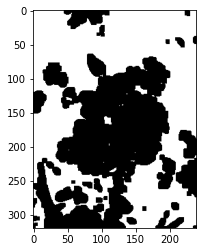

In [3]:
# read the image
img = cv2.imread(r"Image.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

#kernel is used to define how many pixels do you erode or dilate.
# define the kernel
kernel = np.ones((5, 5), np.uint8)

# invert the image
invert = cv2.bitwise_not(binr)

# erode the image
erosion = cv2.erode(invert, kernel,iterations=1)

# print the output
plt.imshow(erosion, cmap='gray')

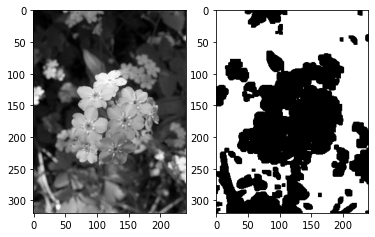

In [4]:
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img,cmap='gray')
ax[1].imshow(erosion,cmap='gray')

# Dilation

Dilation adds pixels to the boundaries of the objects in an image.

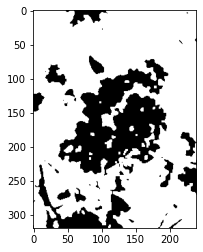

In [5]:
#read the image
img = cv2.imread(r"Image.jpg", 0)
  
#binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

#kernel is used to define how many pixels do you erode or dilate. 
#define the kernel
kernel = np.ones((3, 3), np.uint8)
  
#invert the image
invert = cv2.bitwise_not(binr)
  
#dilate the image               #iterations=how many times
dilation = cv2.dilate(invert, kernel, iterations=1)
  
#print the output
plt.imshow(dilation, cmap='gray')

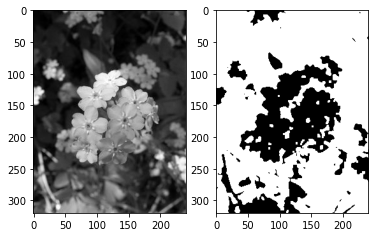

In [6]:
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img,cmap='gray')
ax[1].imshow(dilation,cmap='gray')

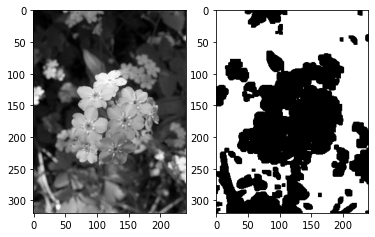

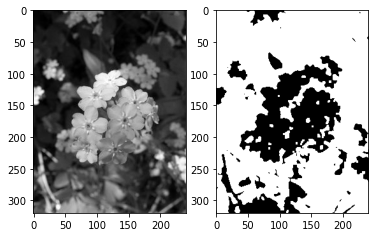

In [7]:
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img,cmap='gray')
ax[1].imshow(erosion,cmap='gray')
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img,cmap='gray')
ax[1].imshow(dilation,cmap='gray')

# Opening

Opening involves erosion followed by dilation in the outer surface (the foreground) of the image.

All the above-said constraints for erosion and dilation applies here.

 It is a blend of the two prime methods.

It is generally used to remove the noise in the image.

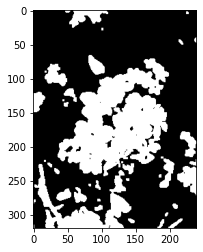

In [8]:
# read the image
img = cv2.imread(r"Image.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((3, 3), np.uint8)

# opening the image
opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN,kernel, iterations=1)
# print the output
plt.imshow(opening, cmap='gray')

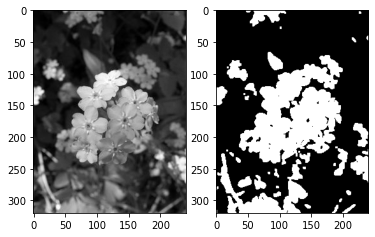

In [9]:
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img,cmap='gray')
ax[1].imshow(opening,cmap='gray')

# Closing

Closing involves dilation followed by erosion in the outer surface (the foreground) of the image.

All the above-said constraints for erosion and dilation applies here.

It is a blend of the two prime methods.

It is generally used to remove the noise in the image.

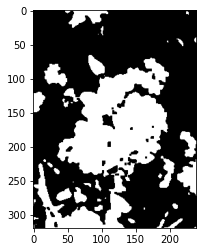

In [10]:
# read the image
img = cv2.imread(r"Image.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((3, 3), np.uint8)

# opening the image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)

# print the output
plt.imshow(closing, cmap='gray')

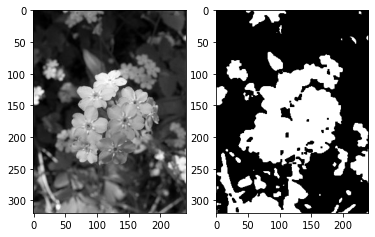

In [11]:
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img,cmap='gray')
ax[1].imshow(closing,cmap='gray')

# Morphological Gradient

Morphological gradient is slightly different than the other operations, because, the morphological gradient first applies erosion and dilation individually on the image and then computes the difference between the eroded and dilated image. 

The output will be an outline of the given image.

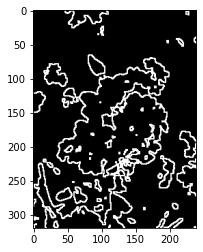

In [12]:
# read the image
img = cv2.imread(r"Image.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((3, 3), np.uint8)

# invert the image
invert = cv2.bitwise_not(binr)

# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)

# print the output
plt.imshow(morph_gradient, cmap='gray')


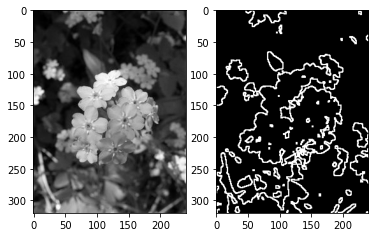

In [13]:
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img,cmap='gray')
ax[1].imshow(morph_gradient,cmap='gray')

# Top Hat

Top Hat is yet another morphological operation where Opening is performed on the binary image and the output of this operation is a difference between the input image and the opened image. 

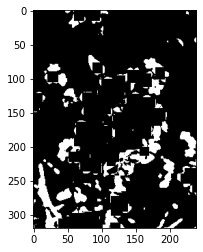

In [15]:
# read the image
img = cv2.imread(r"Image.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((13, 13), np.uint8)

# use morph gradient
morph_gradient = cv2.morphologyEx(binr,cv2.MORPH_TOPHAT,kernel)

# print the output
plt.imshow(morph_gradient, cmap='gray')

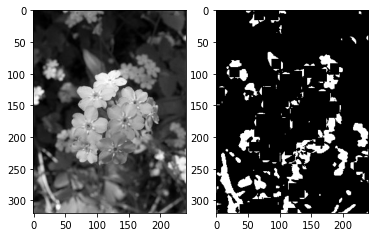

In [16]:
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img,cmap='gray')
ax[1].imshow(morph_gradient,cmap='gray')

# Black Hat

The black-hat operation is used to do the opposite, enhancing dark objects of interest on a bright background.

The output of this operation is the difference between the closing of the input image and the input image. 

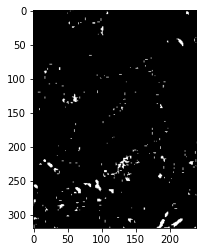

In [4]:
# read the image
img = cv2.imread("Image.jpg", 0)

# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((5, 5), np.uint8)

# invert the image
invert = cv2.bitwise_not(binr)

# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_BLACKHAT,kernel)

# print the output
plt.imshow(morph_gradient, cmap='gray')